In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#cross_val_score用來檢測預測的精確度
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')


Y_train = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id','SalePrice'],axis =1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [73]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype == 'int64' or dtype == 'float64':
        num_features.append(feature)
print(f'{len(num_features)} Numerical Feature {num_features}')


36 Numerical Feature ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [74]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


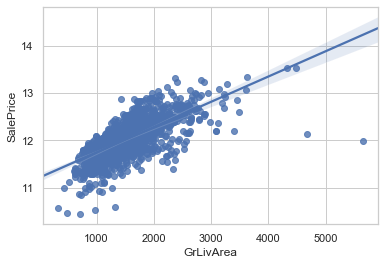

0.8499683837163878


In [75]:
# 顯示 GrLivArea 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'whitegrid')
sns.regplot(x = df['GrLivArea'],y = Y_train)
plt.show()

# 做線性迴歸, 觀察分數
X_train = MMEncoder.fit_transform(df)
estimator = LinearRegression()
#判斷資料集做出預測的精確程度
print(cross_val_score(estimator, X_train , Y_train,cv = 5).mean())

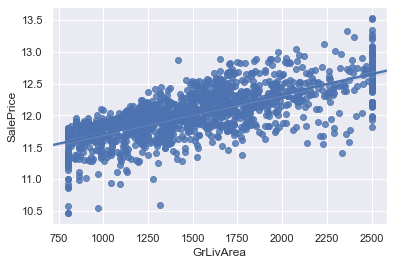

0.8590286613713278


In [76]:
# 將 GrLivArea 限制在 800 到 2500 以內, 調整離群值
df['GrLivArea'] = df['GrLivArea'].clip(800,2500)
sns.set(style = 'darkgrid',palette='deep')
sns.regplot(x = df['GrLivArea'], y = Y_train)
plt.show()

#做線性回歸觀察分數
X_train = MMEncoder.fit_transform(df)
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train,cv = 5).mean())

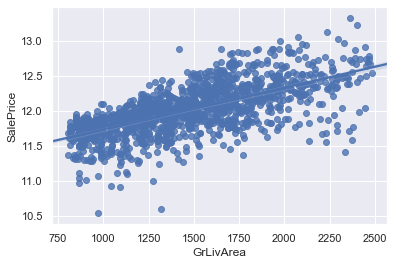

[[0.23529412 0.21019108 0.0334198  ... 0.         0.09090909 0.5       ]
 [0.         0.25796178 0.03879502 ... 0.         0.36363636 0.25      ]
 [0.23529412 0.21974522 0.04650728 ... 0.         0.72727273 0.5       ]
 ...
 [0.29411765 0.2133758  0.03618687 ... 0.16129032 0.36363636 1.        ]
 [0.         0.21974522 0.03934189 ... 0.         0.27272727 1.        ]
 [0.         0.24203822 0.04037019 ... 0.         0.45454545 0.5       ]]
0.8765064877034943


In [77]:
# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_index = (df['GrLivArea']>800) & (df['GrLivArea']<2500)
df_ch =  df[keep_index]
Y_train_ch = Y_train[keep_index]

sns.set(style = 'darkgrid')
sns.regplot(x = df_ch['GrLivArea'], y = Y_train_ch)
plt.show()

MMEncoder = MinMaxScaler()
X_train = MMEncoder.fit_transform(df_ch)
print(X_train)
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train_ch,cv =5).mean())

作業1

試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

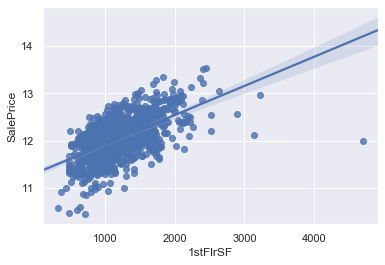

0.8590286613713278


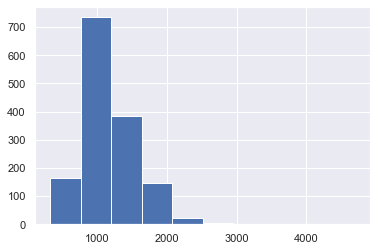

In [79]:
app_train = Y_train.shape[0]

sns.set(style = 'darkgrid')
sns.regplot(x = df['1stFlrSF'][:app_train], y =Y_train)
plt.show()
#做線性回歸，觀察預測值的準確分數
df['1stFlrSF'].hist()

X_train = MMEncoder.fit_transform(df)
estimator = LinearRegression()

print(cross_val_score(estimator,X_train,Y_train, cv =5).mean())


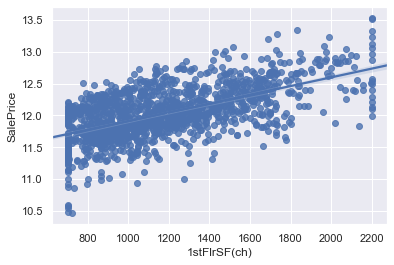

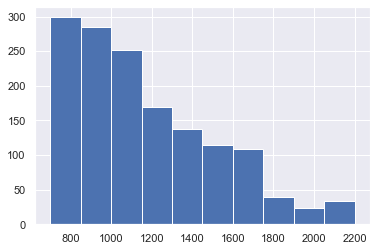

1460
0.8633589778049815


In [80]:
 df['1stFlrSF(ch)'] = df['1stFlrSF'].clip(700,2200)


sns.set(style = 'darkgrid')
sns.regplot(x = df['1stFlrSF(ch)'],y =Y_train)
plt.show()
#做線性回歸，觀察預測值的準確分數
df['1stFlrSF(ch)'].hist()
plt.show()
print(df['1stFlrSF(ch)'].shape[0])

X_train = MMEncoder.fit_transform(df)
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train,cv = 5).mean())

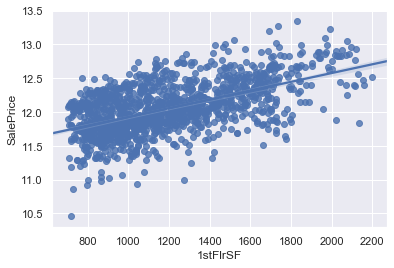

0.8900447105966999


In [89]:
keep_region = (df['1stFlrSF']>700) & (df['1stFlrSF']<2200)
df_ch_1stFlrSF = df[keep_region]
Y_train_ch_1stFlrSF = Y_train[keep_region]

sns.set(style = 'darkgrid')
sns.regplot(x = df_ch_1stFlrSF['1stFlrSF'], y = Y_train_ch_1stFlrSF)
plt.show()

#檢定它的精確度
MMEncoder = MinMaxScaler()
X_train = MMEncoder.fit_transform(df_ch_1stFlrSF)
estimator = LinearRegression()
print(cross_val_score(estimator,X_train,Y_train_ch_1stFlrSF,
                      cv = 5).mean())